**Loading the Dataset and Overview**

In [1]:
#downloading the zip file from GDrvive
try:
  #running the gdown command
  !gdown --id 1wXuQ8ik_aUvibGy6ob7FJeA-it1SjZeb -O kidney_disease.zip
  print('File downloaded succesfully💢😀')
except Exception as e:
  #Handle any error
  print(f"Failed to download the file.Error:{e} 😒🤦‍♀️")
finally:
  print("Download process complete🥳👌🎆")

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wXuQ8ik_aUvibGy6ob7FJeA-it1SjZeb
To: /content/kidney_disease.zip
100% 9.74k/9.74k [00:00<00:00, 21.2MB/s]
File downloaded succesfully💢😀
Download process complete🥳👌🎆


In [2]:
#Unziping the file to csv format
import zipfile
zip_ref = zipfile.ZipFile('/content/kidney_disease.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

 **Data-Assessing**

In [3]:
#import the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
%matplotlib inline
pd.set_option('display.max_columns',30)# helps in viewing the dataset clearing ignorring '...'

In [4]:
df=pd.read_csv('/content/kidney_disease.csv')
df.shape

(400, 26)

In [5]:
df.sample(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
337,337,44.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,92.0,40.0,0.9,141.0,4.9,14.0,52,7500,6.2,no,no,no,good,no,no,notckd
347,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43,7200,5.5,no,no,no,good,no,no,notckd
299,299,73.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,127.0,48.0,0.5,150.0,3.5,15.1,52,11000,4.7,no,no,no,good,no,no,notckd
189,189,64.0,60.0,1.010,4.0,1.0,abnormal,abnormal,notpresent,present,239.0,58.0,4.3,137.0,5.4,9.5,29,7500,3.4,yes,yes,no,poor,yes,no,ckd
195,195,70.0,90.0,1.020,2.0,1.0,abnormal,abnormal,notpresent,present,184.0,98.6,3.3,138.0,3.9,5.8,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd
95,95,62.0,90.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,94.0,25.0,1.1,131.0,3.7,NaN,NaN,NaN,NaN,yes,no,no,good,yes,yes,ckd
241,241,57.0,70.0,1.015,1.0,0.0,NaN,abnormal,notpresent,notpresent,165.0,45.0,1.5,140.0,3.3,10.4,31,4200,3.9,no,no,no,good,no,no,ckd
277,277,46.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,123.0,46.0,1.0,135.0,5.0,15.7,50,6300,4.8,no,no,no,good,no,no,notckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
255,255,34.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,121.0,27.0,1.2,144.0,3.9,13.6,52,9200,6.3,no,no,no,good,no,no,notckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**Basic Data-Cleaning**

In [7]:
df.isnull().sum().sort_values(ascending=False)# checking for missing values

,0
rbc,152
rc,130
wc,105
pot,88
sod,87
pcv,70
pc,65
hemo,52
su,49
sg,47


In [8]:
df.duplicated().sum()# duplicate value count

np.int64(0)

In [9]:
#descriptive statistics
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
#droping id column
df.drop('id',axis=1,inplace=True)

In [11]:
#Rename the columns
dict_rename={'age':'Age',
             'bp':'Blood_presure',
              'sg': 'specific_gravity',
             'al':'albumin',
             'su':'sugar',
             'rbc':'red_blood_cells',
             'pc':'pus_cell',
             'pcc':'pus_cells_clumps',
             'ba':'bacteria',
             'bgr':'blood_glucose_random',
             'bu':'blood_urea',
             'sc': 'serum_creatinine',
             'sod': 'sodium',
             'pot': 'potassium',
             'hemo': 'hemoglobin',
             'pcv':'packed_cell_volume',
             'wc':'white_blood_cell_count',
             'rc': 'red_blood_cell_count',
             'htn': 'hypertension',
             'dm': 'diabetes_millitus',
             'cad':'coronary_artery_disease',
             'appet': 'appetite',
             'pe':'pedal_edema',
             'ane': 'anemia',
             'classification': 'class'}

df.rename(columns=dict_rename,inplace=True)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_presure            388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cells_clumps         396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

*from the above we get a picture that--The columns **`packed_cell_volume`**, **`white_blood_cell_count`**, and **`red_blood_cell_count`** are currently of **object type** and will be converted to **numeric type**.*

In [12]:
#convert object type to numeric type
df[['white_blood_cell_count','red_blood_cell_count','packed_cell_volume']]=df[['white_blood_cell_count','red_blood_cell_count','packed_cell_volume']].apply(pd.to_numeric,errors='coerce')

In [13]:
df.columns

Index(['Age', 'Blood_presure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cells_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_millitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [14]:
#extracting numerical and object columns
cat_cols=[col for col in df.columns if df[col].dtype == 'object']
num_cols=[col for col in df.columns if df[col].dtype != 'object']

In [15]:
print(f"Total categorical columns: {len(cat_cols)}")
print(f"Total numerical columns: {len(num_cols)}")


Total categorical columns: 11
Total numerical columns: 14


In [16]:
#unique values in categorical columns
for col in cat_cols:
  print(f"\n ♦️ {col} (Unique_Values : {df[col].nunique()})")
  print(df[col].value_counts(), "\n" + "-"*40)


 ♦️ red_blood_cells (Unique_Values : 2)
red_blood_cells
normal      201
abnormal     47
Name: count, dtype: int64 
----------------------------------------

 ♦️ pus_cell (Unique_Values : 2)
pus_cell
normal      259
abnormal     76
Name: count, dtype: int64 
----------------------------------------

 ♦️ pus_cells_clumps (Unique_Values : 2)
pus_cells_clumps
notpresent    354
present        42
Name: count, dtype: int64 
----------------------------------------

 ♦️ bacteria (Unique_Values : 2)
bacteria
notpresent    374
present        22
Name: count, dtype: int64 
----------------------------------------

 ♦️ hypertension (Unique_Values : 2)
hypertension
no     251
yes    147
Name: count, dtype: int64 
----------------------------------------

 ♦️ diabetes_millitus (Unique_Values : 5)
diabetes_millitus
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64 
----------------------------------------

 ♦️ coronary_artery_disease (Unique_Values : 3)
corona

*some ambugity is present in the following columns like class coronary_artery_disease and diabetes_millitus that needs to be removed.(that is shown in the next step)*

In [17]:
# replace incorrect values
df['diabetes_millitus']=df['diabetes_millitus'].apply(lambda x: x.strip() if isinstance(x,str) else x)
df['coronary_artery_disease'] = df['coronary_artery_disease'].apply(lambda x: x.strip() if isinstance(x,str) else x)
df['class'] = df['class'].apply(lambda x: x.strip().replace('notckd','not ckd')if isinstance(x,str) else x)

In [18]:
# Convert the 'class' column to binary numeric form (0 and 1)
df['class'] = df['class'].map({'ckd':0 , 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [19]:
check_cols = ['class','coronary_artery_disease','diabetes_millitus']
for col in check_cols:
  print(f'{col} has {df[col].unique()} values')

class has [0 1] values
coronary_artery_disease has ['no' 'yes' nan] values
diabetes_millitus has ['yes' 'no' nan] values


**EXPLORATORY DATA ANALYSIS[EDA]**

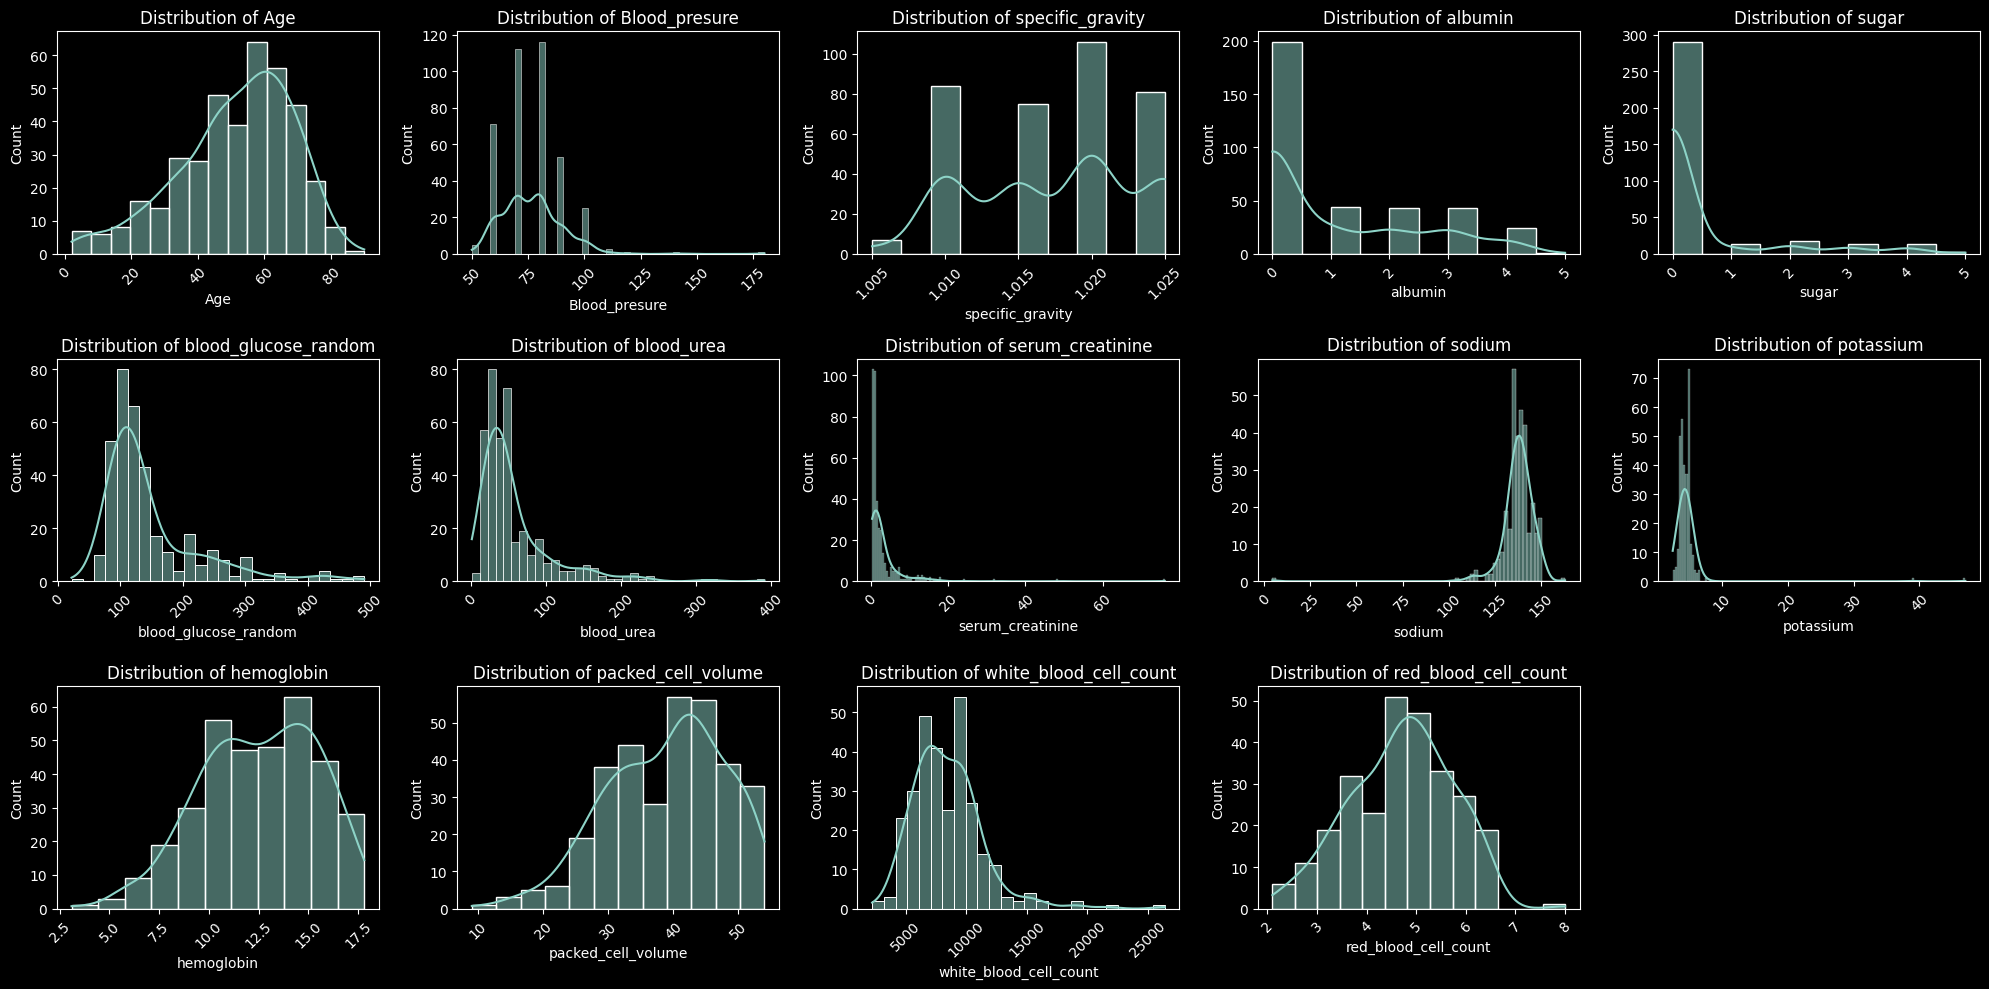

In [20]:
# checking numerical features distribution
fig,axes = plt.subplots(3,5, figsize=(20,10))# Define the figure and subplots (3 rows, 5 columns)
axes=axes.flatten() # Convert to 1D array

# Plot histograms for each numerical column
for i,col in enumerate(num_cols):
  sns.histplot(data=df,x=col,kde=True,ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].tick_params(axis='x',rotation=45)

fig.delaxes(axes[-1])# Remove the **last empty subplot** (since 3x5 = 15, but we only have 14 columns)

plt.tight_layout()# Adjust layout to prevent overlapping
plt.show()




*above it is observed that,Skewness is present in some of the columns*

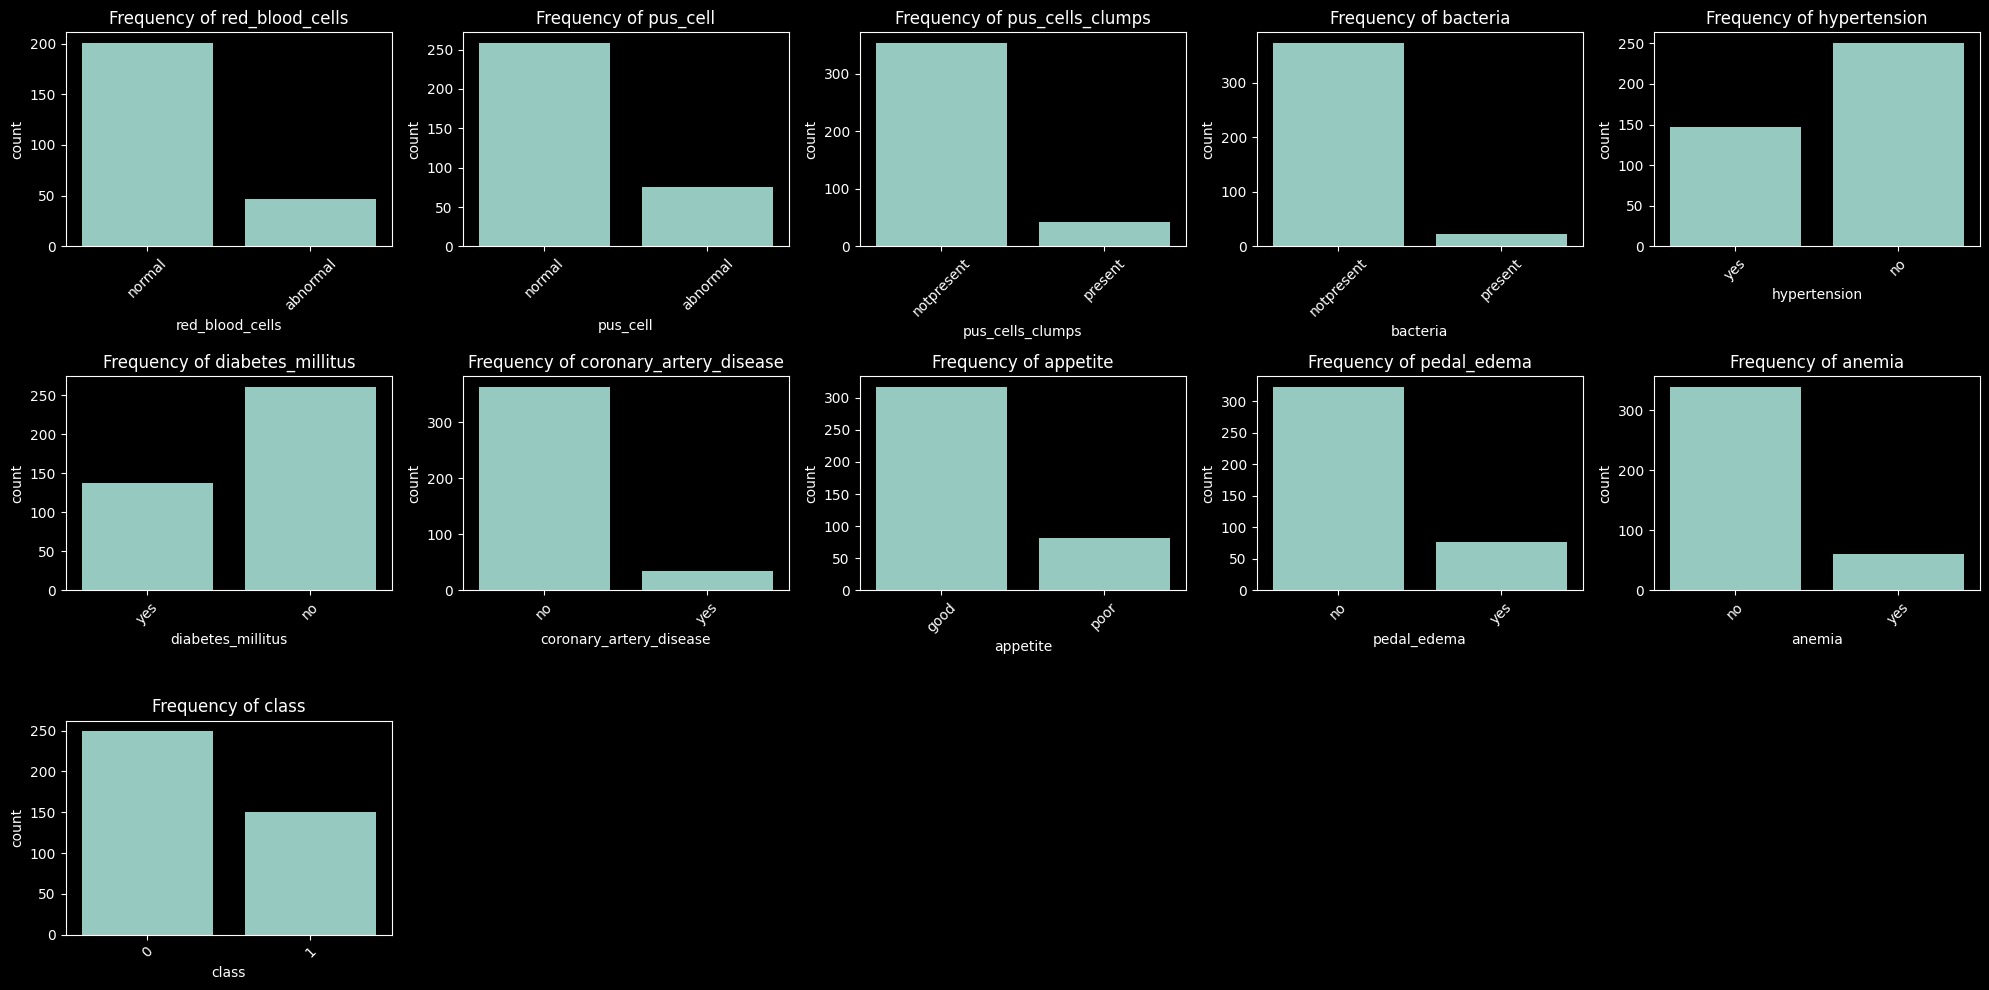

In [21]:
# doing the same for categorical columns
fig,axes=plt.subplots(3,5,figsize=(20,10))#defineing the figure and subplots of 2rows and 5columns
axes=axes.flatten()#convert to 1D array

#plot countplot for each categorical columns
for i,col in enumerate(cat_cols):
  sns.countplot(data=df,x=col,ax=axes[i])
  axes[i].set_title(f'Frequency of {col}')
  axes[i].tick_params(axis='x',rotation =45)

for j in range(-4,0):# Deletes last 4 subplots (if extra)
 fig.delaxes(axes[j])


plt.tight_layout()#prevents overlapping of the visualazation
plt.show()


In [22]:
# defining functions to create plot
def kde(col):
  grid=sns.FacetGrid(df,hue="class",height=6,aspect=2)#Allows multiple KDE curves in the same plot.
  grid.map(sns.kdeplot,col)
  grid.add_legend()

def scatter(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color="class",template='plotly_dark')
  return fig.show()



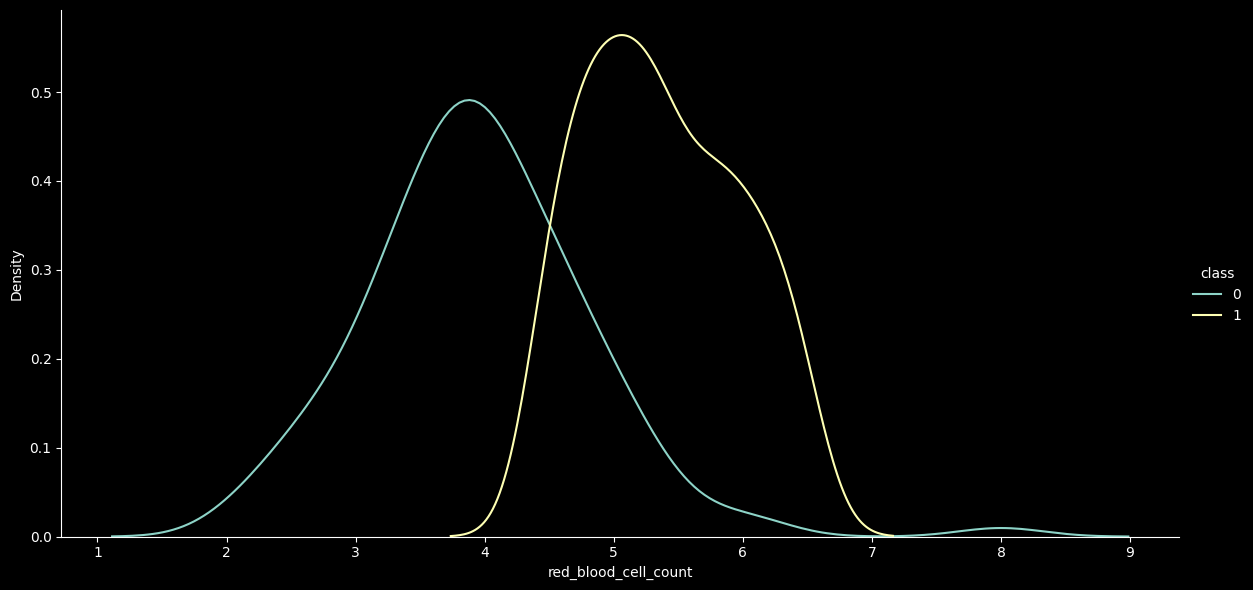

In [23]:
kde('red_blood_cell_count')

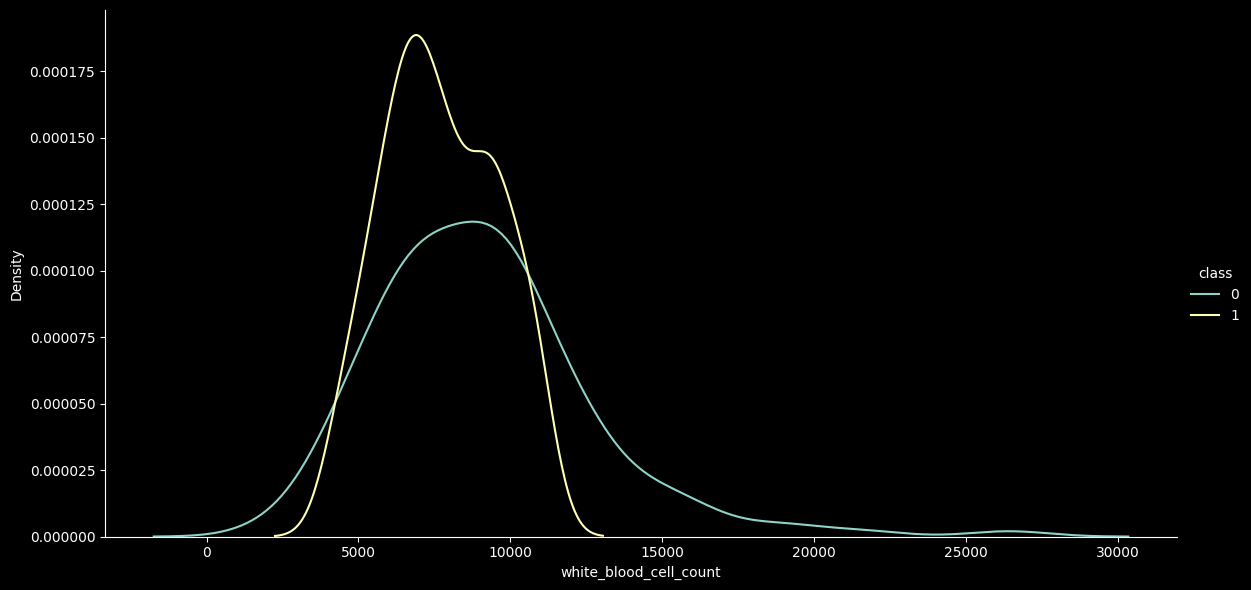

In [24]:
kde('white_blood_cell_count')

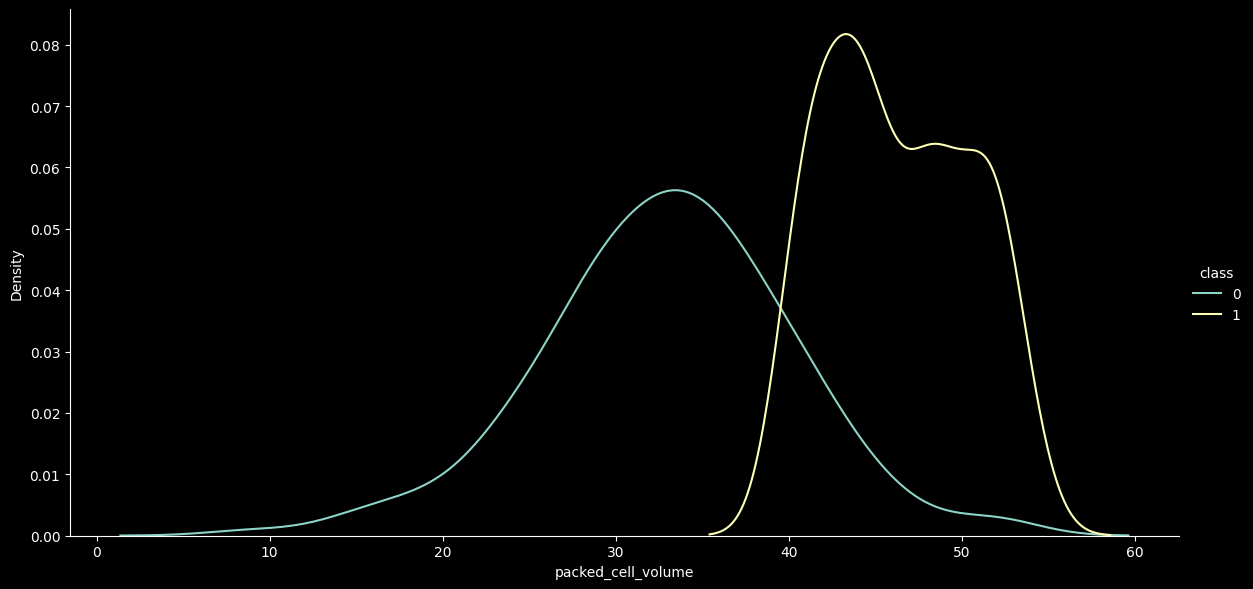

In [25]:
kde('packed_cell_volume')

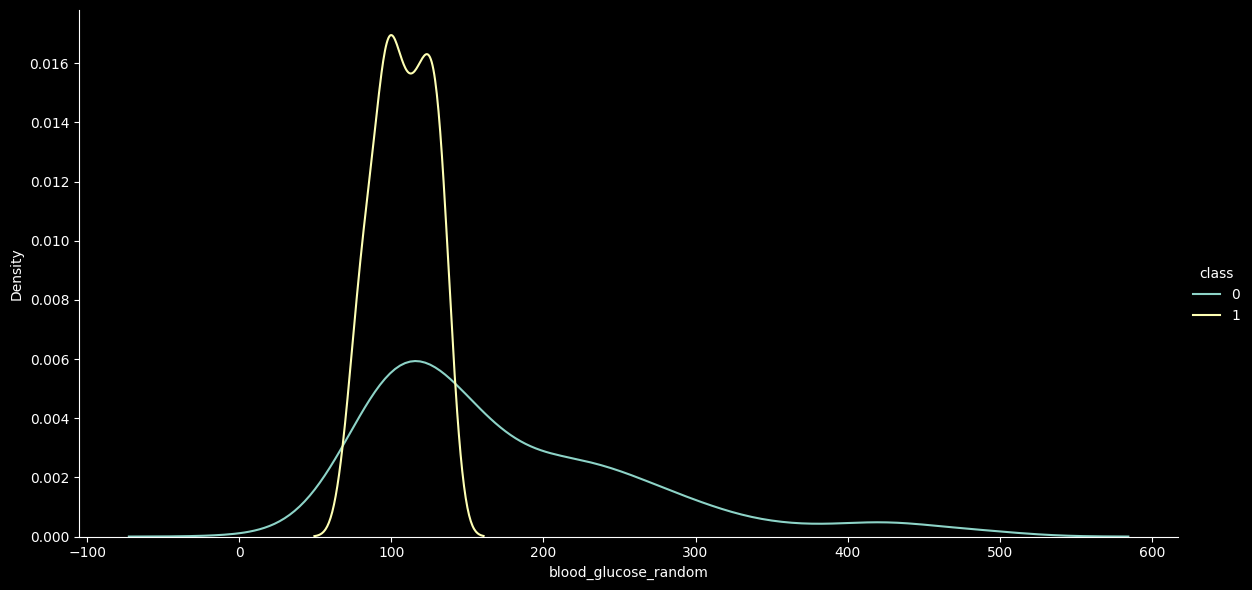

In [26]:
kde('blood_glucose_random')

In [27]:
scatter('hemoglobin', 'packed_cell_volume')

In [28]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [29]:
scatter('red_blood_cell_count', 'albumin')

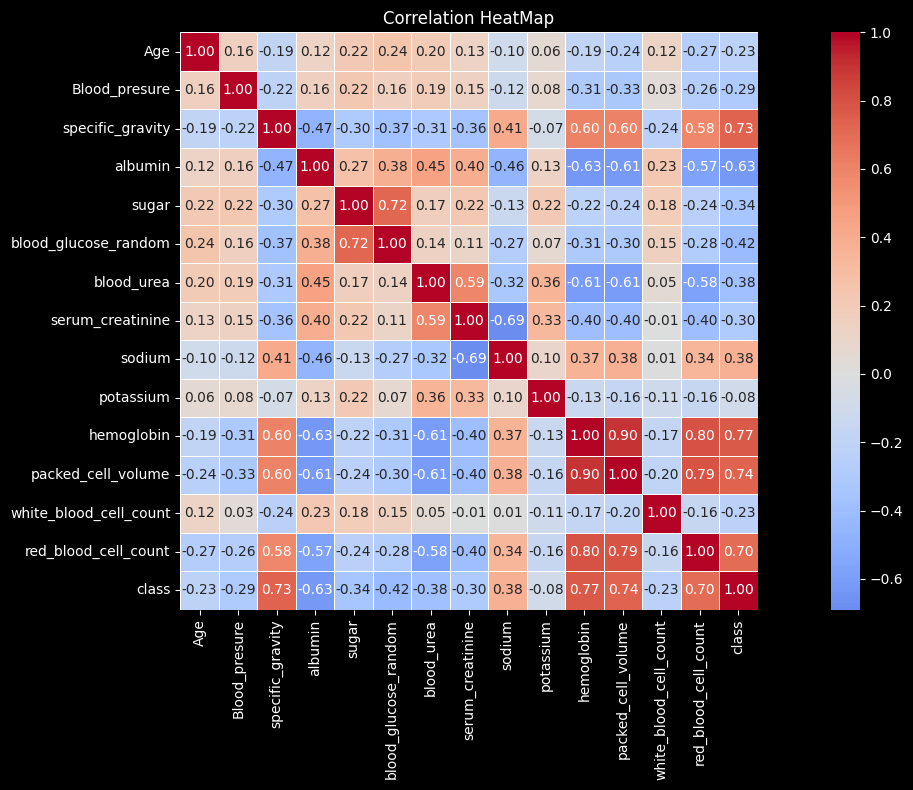

In [30]:
corr_matrix=df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0,fmt='.2f',square=True,linewidths=0.5)

plt.title('Correlation HeatMap')
plt.tight_layout()
plt.show()

**Feature Engineering**

1. Data Pre-processing

In [31]:
df[num_cols].isnull().sum().sort_values(ascending=False)#checking for null values

,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
hemoglobin,52
sugar,49
specific_gravity,47
albumin,46
blood_glucose_random,44


In [32]:
# Fill missing values in numeric columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer=IterativeImputer(random_state=42,max_iter=10,sample_posterior=True)
# Use IterativeImputer to fill in missing values
df[num_cols]=imputer.fit_transform(df[num_cols])

In [33]:
df[num_cols].isnull().sum()

,0
Age,0
Blood_presure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [34]:
df[cat_cols].isnull().sum().sort_values(ascending=False)

,0
red_blood_cells,152
pus_cell,65
pus_cells_clumps,4
bacteria,4
hypertension,2
diabetes_millitus,2
coronary_artery_disease,2
appetite,1
pedal_edema,1
anemia,1


In [35]:
# For feature columns with many missing values: use random values to fill in
def random_value_imputation(feature):
  random_sample=df[feature].dropna().sample(df[feature].isna().sum())
  random_sample.index=df[df[feature].isnull()].index
  df.loc[df[feature].isnull(),feature] =random_sample

# For feature columns with relatively few missing values: use the mode to fill in
def impute_mode(feature):
  mode=df[feature].mode()[0]
  df[feature]=df[feature].fillna(mode)


# For the categorical columns red_blood_cells and pus_cell, use random sampling to fill
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

# For other categorical data columns, use the mode to fill
for col in cat_cols:
  impute_mode(col)

In [36]:
df[cat_cols].isnull().sum().sort_values(ascending=False)

,0
red_blood_cells,0
pus_cell,0
pus_cells_clumps,0
bacteria,0
hypertension,0
diabetes_millitus,0
coronary_artery_disease,0
appetite,0
pedal_edema,0
anemia,0


2. Feature Encoding

In [37]:
for col in cat_cols:
  print(f'{col} has {df[col].nunique()} categories\n')

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cells_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_millitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



*above all has 2 categories so we use label encoder*

In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_cols:
  df[col]=le.fit_transform(df[col])

In [39]:
df.head()

,Age,Blood_presure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cells_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_millitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.000000,36.0,1.2,131.462555,16.109603,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,247.256911,18.0,0.8,141.456801,5.131347,11.3,38.0,6000.0,4.876532,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,135.801344,3.875947,9.6,31.0,7500.0,2.313891,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,140.220324,0.650341,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,0


**MODEL BUILDING**

In [40]:
ind_col=[col for col in df.columns if col != 'class']
dep_col='class'

x=df[ind_col]
y=df[dep_col]

In [41]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [42]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In [43]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, x_train, y_train, x_test, y_test):

  #train classifier
  classifier.fit(x_train, y_train)

  #make prediction
  y_train_pred = classifier.predict(x_train)
  y_test_pred = classifier.predict(x_test)

  #Evaluate the model
  train_accuracy = accuracy_score(y_train, y_train_pred)
  accuracy =  accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred , average='macro')
  recall = recall_score(y_test,y_test_pred,average='macro')
  f1 = f1_score(y_test,  y_test_pred, average='macro')
  conf_matrix = confusion_matrix(y_test, y_test_pred)
  class_report = classification_report(y_test, y_test_pred)

     # Print the evaluation metrics
  print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
  print(f"Confusion Matrix:\n{conf_matrix}\n")
  print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
  print(f"Test Precision of {model_name}: {precision:.5f}")
  print(f"Test Recall of {model_name}: {recall:.5f}")
  print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
  print(f"Classification Report:\n{class_report}")

    # Return the metrics as a dictionary
  return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

1. KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of K-Nearest Neighbors: 0.94286

Confusion Matrix:
[[67  9]
 [ 0 44]]

Test Accuracy of K-Nearest Neighbors: 0.92500
Test Precision of K-Nearest Neighbors: 0.91509
Test Recall of K-Nearest Neighbors: 0.94079
Test F1 Score of K-Nearest Neighbors: 0.92214

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        76
           1       0.83      1.00      0.91        44

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.92       120
weighted avg       0.94      0.93      0.93       120



2. Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Gaussian Naive Bayes: 0.95357

Confusion Matrix:
[[71  5]
 [ 3 41]]

Test Accuracy of Gaussian Naive Bayes: 0.93333
Test Precision of Gaussian Naive Bayes: 0.92538
Test Recall of Gaussian Naive Bayes: 0.93301
Test F1 Score of Gaussian Naive Bayes: 0.92889

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        76
           1       0.89      0.93      0.91        44

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



3. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_name = "Logistic Regression"
logreg_results = evaluate_model(logreg, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Logistic Regression: 0.99286

Confusion Matrix:
[[75  1]
 [ 2 42]]

Test Accuracy of Logistic Regression: 0.97500
Test Precision of Logistic Regression: 0.97539
Test Recall of Logistic Regression: 0.97069
Test F1 Score of Logistic Regression: 0.97295

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



4. Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC

svm = SVC()
model_name = 'Support Vector Machine'
svm_results = evaluate_model(svm, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Support Vector Machine: 0.98929

Confusion Matrix:
[[75  1]
 [ 0 44]]

Test Accuracy of Support Vector Machine: 0.99167
Test Precision of Support Vector Machine: 0.98889
Test Recall of Support Vector Machine: 0.99342
Test F1 Score of Support Vector Machine: 0.99107

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



5. Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model_name = 'Decision Tree'
dtc_results = evaluate_model(dtc, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Decision Tree: 1.00000

Confusion Matrix:
[[73  3]
 [ 2 42]]

Test Accuracy of Decision Tree: 0.95833
Test Precision of Decision Tree: 0.95333
Test Recall of Decision Tree: 0.95754
Test F1 Score of Decision Tree: 0.95535

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.93      0.95      0.94        44

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



6.Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = 'Random Forest'
rfc_results = evaluate_model(rfc, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[76  0]
 [ 2 42]]

Test Accuracy of Random Forest: 0.98333
Test Precision of Random Forest: 0.98718
Test Recall of Random Forest: 0.97727
Test F1 Score of Random Forest: 0.98188

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.95      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



7. Extra Trees

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model_name = 'Extra Trees'
etc_results = evaluate_model(etc, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Extra Trees: 1.00000

Confusion Matrix:
[[75  1]
 [ 3 41]]

Test Accuracy of Extra Trees: 0.96667
Test Precision of Extra Trees: 0.96886
Test Recall of Extra Trees: 0.95933
Test F1 Score of Extra Trees: 0.96376

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.98      0.93      0.95        44

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



8. Adaptive Boosting (AdaBoost)

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model_name = 'AdaBoost'
ada_results = evaluate_model(ada, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of AdaBoost: 1.00000

Confusion Matrix:
[[75  1]
 [ 2 42]]

Test Accuracy of AdaBoost: 0.97500
Test Precision of AdaBoost: 0.97539
Test Recall of AdaBoost: 0.97069
Test F1 Score of AdaBoost: 0.97295

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



9.Gradient Boosting Machine (GBM)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
model_name = 'Gradient Boosting Machine'
gbm_results = evaluate_model(gbm, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Gradient Boosting Machine: 1.00000

Confusion Matrix:
[[75  1]
 [ 2 42]]

Test Accuracy of Gradient Boosting Machine: 0.97500
Test Precision of Gradient Boosting Machine: 0.97539
Test Recall of Gradient Boosting Machine: 0.97069
Test F1 Score of Gradient Boosting Machine: 0.97295

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



10. Stochastic Gradient Boosting Machine (SGBM)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a stochastic gradient boosting classifier
sgbm = GradientBoostingClassifier(subsample=0.7)  # Use a subsample ratio of 0.7 to emphasize randomness
model_name = 'Stochastic Gradient Boosting Machine'
sgbm_results = evaluate_model(sgbm, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Stochastic Gradient Boosting Machine: 1.00000

Confusion Matrix:
[[75  1]
 [ 2 42]]

Test Accuracy of Stochastic Gradient Boosting Machine: 0.97500
Test Precision of Stochastic Gradient Boosting Machine: 0.97539
Test Recall of Stochastic Gradient Boosting Machine: 0.97069
Test F1 Score of Stochastic Gradient Boosting Machine: 0.97295

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



11. eXtreme Gradient Boosting (XGBoost)

In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_name = 'XGBoost'
xgb_results = evaluate_model(xgb, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of XGBoost: 1.00000

Confusion Matrix:
[[74  2]
 [ 1 43]]

Test Accuracy of XGBoost: 0.97500
Test Precision of XGBoost: 0.97111
Test Recall of XGBoost: 0.97548
Test F1 Score of XGBoost: 0.97321

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



13.  Light Gradient Boosting Machine (LightGBM)

In [55]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1)
model_name = 'LightGBM'
lgbm_results = evaluate_model(lgbm, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of LightGBM: 1.00000

Confusion Matrix:
[[75  1]
 [ 1 43]]

Test Accuracy of LightGBM: 0.98333
Test Precision of LightGBM: 0.98206
Test Recall of LightGBM: 0.98206
Test F1 Score of LightGBM: 0.98206

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



14. Multilayer Perceptron (MLP)

In [56]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
model_name = 'Multilayer Perceptron'
mlp_results = evaluate_model(mlp, model_name, x_train, y_train, x_test, y_test)

Training Accuracy of Multilayer Perceptron: 0.99643

Confusion Matrix:
[[75  1]
 [ 0 44]]

Test Accuracy of Multilayer Perceptron: 0.99167
Test Precision of Multilayer Perceptron: 0.98889
Test Recall of Multilayer Perceptron: 0.99342
Test F1 Score of Multilayer Perceptron: 0.99107

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



**MODEL COMPARISION**

In [57]:
accuracy_of_model = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost'
              , 'GBM', 'SGBM', 'XGBoost',
               'LightGBM', 'MLP'],
    'Score': [knn_results['Accuracy'], gnb_results['Accuracy'], logreg_results['Accuracy'],
              svm_results['Accuracy'], dtc_results['Accuracy'], rfc_results['Accuracy'],
              etc_results['Accuracy'], ada_results['Accuracy'],
              gbm_results['Accuracy'], sgbm_results['Accuracy'], xgb_results['Accuracy'],
               lgbm_results['Accuracy'], mlp_results['Accuracy']]
})

accuracy_sorted = accuracy_of_model.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
3,SVM,0.991667
12,MLP,0.991667
5,Random Forest,0.983333
11,LightGBM,0.983333
2,Logistic Regression,0.975000
10,XGBoost,0.975000
8,GBM,0.975000
9,SGBM,0.975000
7,AdaBoost,0.975000
6,Extra Trees,0.966667


In [58]:
px.bar(data_frame =accuracy_of_model, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison',text = 'Score')